### Image Classification with Tensorflow ###


### Preparation ###
In this worksheet you will collect two sets of images for classification. One of the class will be labeled "pos" and the other "neg". You can download the images from Internet. For example the positive ("pos") images can be only male portrait photos, and the "neg" are female portrait photos. Decide on how many images you want to use for training. Adjust the quantity after you have tested it, i.e. you may want to add more images if the classifcation don't work well. 

On your computer create a folder structure like this:

![](img/folder.png)

In the "pos" folder put in all the positive images, and in the "neg" folder put in the negative images. In the separate "test" folder put in a mix class of images that you want to test.

If you want to upload to colab, then zip the entire folders to create a zipped file called: dataset.zip

The dataset.zip should have this structure:

![](img/zipfolder.png)

### Question ### 

Modify the code below using one of the architecture improvements in this weeks lecture. 

1. Mention what changes you have implemented.
1. Report on what differences in results you have observed
1. Comment on the usefulness of the changes that you have implemented.

In [ ]:
#!pip install tensorflow==2.0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


If you are using Colab at https://colab.research.google.com/ and you want to upload training files, see below:

In [ ]:
#optional
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
%rm -rf dataset.zip
%rm -rf dataset

In [ ]:
#Upload the dataset to drive much faster than using file upload
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#create a folder in Drive, named it dataset and put the zip file to folder
%cp /content/drive/MyDrive/dataset/dataset.zip /content/

In [ ]:
%cp /content/drive/MyDrive/dataset/dataset4.zip /content/

In [ ]:
%cp /content/drive/MyDrive/dataset/dataset5.zip /content/

In [ ]:
%cp /content/drive/MyDrive/dataset/dataset6.zip /content/

In [ ]:
%cp /content/drive/MyDrive/dataset/dataset-multi.zip /content/

For Colab, after uploading, you want to unzip them. 

In [ ]:
#filename = "dataset.zip"
#filename = "dataset4.zip"
#filename = "dataset5.zip"
#filename = "dataset6.zip"
filename = "dataset-multi.zip"

In [ ]:
#optional for colab
import zipfile
import io
#data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data = zipfile.ZipFile(filename, 'r')
data.extractall()
#data.printdir()

#Now everything is ready, let us check that by printing content of (data) folder:
data.printdir()

#wait for the file to be unzipped. It will appear in the files folder on the left

File Name                                             Modified             Size
dataset/                                       2021-01-01 22:31:18            0
dataset/001/                                   2021-01-01 22:31:10            0
dataset/001/101_001_jpg.rf.cfc433322ef6e818db38890fe8dda6d3.jpg 2021-01-01 22:30:06        22353
dataset/001/101_001_jpg.rf.f6723499e81283a5bdead839e3eb9386.jpg 2021-01-01 22:30:06        22261
dataset/001/101_001_jpg.rf.fcac341b4d0374aff73690a1785bf4a7.jpg 2021-01-01 22:30:06        22186
dataset/001/102_001_jpg.rf.3b486c71fb2d8bf7cfe800840e542815.jpg 2021-01-01 22:30:06        17423
dataset/001/102_001_jpg.rf.bf7d5fd8af992493c805ceacd7b8d7e5.jpg 2021-01-01 22:30:06        17368
dataset/001/102_001_jpg.rf.deac7f2bb895e995ec1868a0eac1fe8d.jpg 2021-01-01 22:30:06        17465
dataset/001/103_001_jpg.rf.dd02e87c0a43c210a3cb6b259ae322b5.jpg 2021-01-01 22:30:06        18970
dataset/001/105_001_jpg.rf.5ac20210eb9b74464825edf31699205f.jpg 2021-01-01 22:30:

Install imutils if not installed yet

In [ ]:
!pip install imutils

Define the NN model in a class

In [ ]:
# import the necessary packages tf 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        #if K.image_data_format() == "channels_first":
        #    inputShape = (depth, height, width)
        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model


Define some parameters and variables

In [ ]:
#initialise name of dataset, model name and image file to save
args={'dataset':'dataset','model':'my.model','plot':'plot.png'}

# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
im_size=(50,50)
num_class=7

# initialize the data and labels
data = []
labels = []

Initialize imports

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

import random
import cv2
import os

Read in the image paths and randomly shuffle them. Resize all image and add the class labels according to the folder it is in. Additional images are generated that are modified.
See: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [ ]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(args["dataset"])))

random.seed(42)
random.shuffle(imagePaths)
# loop over the input images

for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    print(imagePath)
    image = cv2.imread(imagePath)
    #image = cv2.resize(image, (28, 28))
    image = cv2.resize(image, (50, 50))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]

    #change this based on the number of class
    if label=="001":#mustache
      label = 0
    elif label=="010":#hat
      label = 1
    elif label=="011":
      label=2
    elif label=="100":#eyeglasses
      label=3
    elif label=="101":
      label=4
    elif label=="110":
      label=5
    elif label=="111":
      label=6
    #label = 1 if label == "pos" else 0
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=num_class)
testY = to_categorical(testY, num_classes=num_class)

# construct the image generator for data augmentation – adding additional images 
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")


dataset/011/059_011_jpg.rf.e5db104c931419225bc42df5e85ef721.jpg
dataset/101/272_101_jpg.rf.d7bbad0fac4eb7acb2e0a90efa8e35cd.jpg
dataset/001/114_001_jpg.rf.f2830a84721c54641ac109c592538697.jpg
dataset/101/170_101_jpg.rf.7d180486eaaf437fad34ab504fb7394f.jpg
dataset/101/136_101_jpg.rf.ab8605932f5ac6f104bc3b6bbb66a41a.jpg
dataset/010/009_010_jpg.rf.5cf0ff7c5415da45f0b84534b9cd8609.jpg
dataset/101/150_101_jpg.rf.70a286b389be31b9500b496c580e75d6.jpg
dataset/110/227_110_jpg.rf.a98c70bfea0d6466722ce0326d6e91cb.jpg
dataset/101/197_101_jpg.rf.2acd5dc5eac99dcaa2a762f28d6ae6c2.jpg
dataset/111/186_111_jpg.rf.465775d4cdda9af0dc1358218cc37a52.jpg
dataset/101/198_101_jpg.rf.11f450402822c596d60f652a519fa172.jpg
dataset/100/265_100_jpg.rf.2d93131c0e379b573c82740e37bae9fd.jpg
dataset/001/149_001_jpg.rf.66e8735ec8e029961b8db8c759772292.jpg
dataset/101/200_101_jpg.rf.704ba2aba55ff3d1cf4789575e5bb941.jpg
dataset/101/165_101_jpg.rf.381b50a9495dd79874a564dc5e55a5a3.jpg
dataset/test/101/154_101_jpg.rf.9be4d641

Construct and compile the neural network model. It is then trained via the fit function.

In [ ]:
# initialize the model

#model = LeNet.build(width=28, height=28, depth=3, classes=2)
model = LeNet.build(width=im_size[0], height=im_size[1], depth=3, classes=num_class)

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS) 

model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["acc"])
model.summary()

# Saved model and weight trained
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("modelsaved.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')



# train the network
H = model.fit(aug.flow(trainX, trainY, batch_size=BS), callbacks=[checkpoint, early],
        validation_data=(testX, testY), steps_per_epoch=int(len(trainX)/BS),
        epochs=EPOCHS, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 20)        1520      
_________________________________________________________________
activation_8 (Activation)    (None, 50, 50, 20)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 50)        25050     
_________________________________________________________________
activation_9 (Activation)    (None, 25, 25, 50)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)             

Save the model, maybe for later use without retraining..

In [ ]:
# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] serializing network...
INFO:tensorflow:Assets written to: my.model/assets


Plot the loss and accuracy

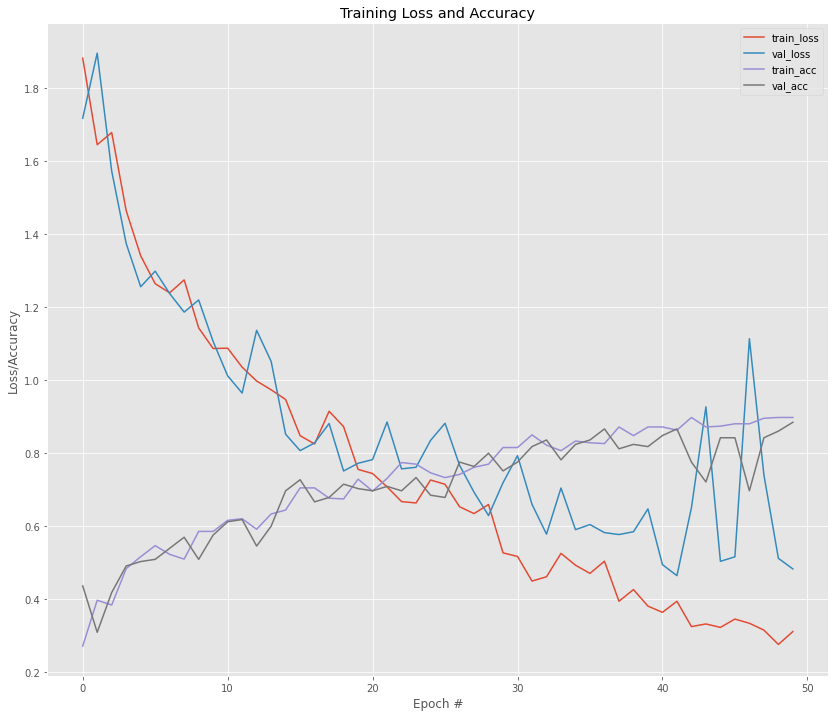

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=[14,12])
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
#plt.title("Training Loss and Accuracy on POS/NEG")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig(args["plot"])


This One for 3 classes

In [ ]:
#copy the graph 3 classes and model to specified folder in drive
%cd /content/
%cp -r /content/plot.png /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'3class'/
%cp -r /content/my.model /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'3class'/

/content


This One for 4 classes

In [ ]:
#copy the graph 4 classes and model to specified folder in drive
%cd /content/
%cp -r /content/plot.png /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'4class'/
%cp -r /content/my.model /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'4class'/

/content


In [ ]:
#copy the graph 5 classes and model to specified folder in drive
%cd /content/
%cp -r /content/plot.png /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'5class'/
%cp -r /content/my.model /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'5class'/

/content


In [ ]:
#copy the graph 6 classes and model to specified folder in drive
%cd /content/
%cp -r /content/plot.png /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'6class'/
%cp -r /content/my.model /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'6class'/

/content


In [ ]:
#copy the graph multi label and model to specified folder in drive
%cd /content/
%cp -r /content/plot.png /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'multi-label'/
%cp -r /content/my.model /content/drive/MyDrive/'Shared Folder'/'Artificial Intelligence'/'Result'/'multi-label'/

/content


In [ ]:
from google.colab import files
import os
os.listdir('.')
files.download('my.model') #name must be the same in model.save

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODIFIED TEST CODE (copy model and dataset first)

In [ ]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from imutils import paths

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

model=load_model('my.model') #check is the correct model
path='dataset/test' #change if needed
imagePaths = sorted(list(paths.list_images(path)))

acc=0
err=0
total_test_images=0

#print(imagePaths)
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    #print(imagePath)
    image = cv2.imread(imagePath)
    #image = cv2.resize(image, (28, 28))
    show_image_ori = image.copy()
    show_image_ori = cv2.cvtColor(show_image_ori, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (50, 50))
    show_image = image.copy()
    show_image = cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB)
    image = img_to_array(image)

    data=np.expand_dims(image, axis=0)
    result=model.predict(data)
    r=np.argmax(result)
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]

    #CLASS info is based on the folder named ‘pos’ ---> change this based on the number of class
    if label=="001":#mustache
      label = 0
    elif label=="010":#hat
      label = 1
    elif label=="011":
      label=2
    elif label=="100":#eyeglasses
      label=3
    elif label=="101":
      label=4
    elif label=="110":
      label=5
    elif label=="111":
      label=6
    if label==r:
      acc+=1
    else:
      err+=1
    #labels=['bang','eyeglasses','hat'] #3class
    #labels=['bang','eyeglasses','hat','wavy'] #4class
    #labels=['bang','eyeglasses','hat','wavy','pointy','wavy'] #5class
    labels=['mustache','hat','hat-mustache','eyeglasses','eyeglasses-mustache','eyeglasses-hat','eyeglasses-hat-mustache'] #6class
    print("Ground Truth:",labels[label])
    print(result)
    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
    ax1.imshow(show_image_ori)
    ax1.set_title('Predict '+labels[r])
    ax2.imshow(show_image)
    ax2.set_title('resized')
    plt.show()
    total_test_images+=1
print("Total test images : ",total_test_images)
print("Test accuracy : ",acc/total_test_images)
print("Test error : ",err/total_test_images)

Test model on other images

In [ ]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from imutils import paths

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model


model=load_model('my.model') #check is the correct model
#path='./dataset/test' #change if needed
path='dataset/test' #change if needed

imagePaths = sorted(list(paths.list_images(path)))
print(imagePaths)
for imagePath in imagePaths:
    image_ori = cv2.imread(imagePath)
    show_image_ori =image_ori.copy()
    show_image_ori = cv2.cvtColor(show_image_ori, cv2.COLOR_BGR2RGB)
    #image = cv2.resize(image_ori, (28, 28))
    image = cv2.resize(image_ori, (50, 50))
    show_image =image.copy()
    show_image = cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB)
    imagearray = img_to_array(image)
    
    data=np.expand_dims(imagearray, axis=0)
    result=model.predict(data)
    #print(imagePath)
    print(result)

    r=np.argmax(result)
    #label=['Neg','Pos'] #POS is 1, NEG is 0
    label=['bang','eyeglasses','hat'] #POS is 1, NEG is 0

    fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2)
    ax1.imshow(show_image_ori)
    ax1.set_title('Predict '+label[r])
    ax2.imshow(show_image)
    ax2.set_title('resized')
    plt.show()

### Question ###
1. How do you select images so that the classification works better?
1. How many images works well for your classification?
1. How can you improve on the model architecture?